# **Linear Regression**


Linear Regression is a method to find a relationship between input variables (features) and an output variable (target).

***Importing Basic Libraries***

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**How can we load it in Python using pandas and see the first few rows?**.

In [269]:
df = pd.read_csv('Food_Delivery_Times.csv')
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


## Exploring the Data**

Check your dataset by some of the commands to quickly see its size, column names, missing values, and basic statistics.

In [270]:
df.shape

(1000, 9)

In [271]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [272]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### Handling Null Values
Fill the missing values in the categorical columns by replacing them with the most frequent value in each column.

In [273]:
cat_col = ['Weather','Traffic_Level','Time_of_Day']
for col in cat_col:
    df[col] = df[col].fillna(df[col].mode()[0])

<Axes: xlabel='Courier_Experience_yrs', ylabel='Count'>

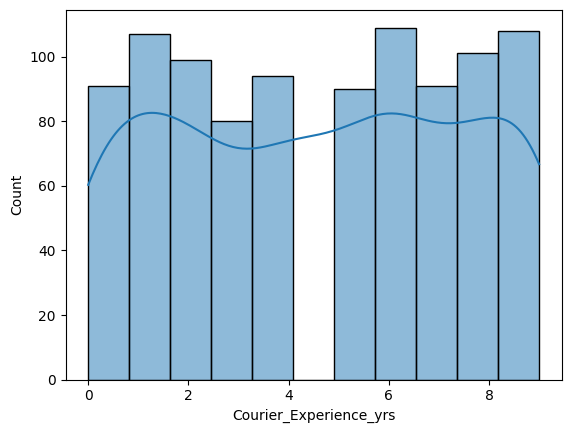

In [274]:
sns.histplot(df['Courier_Experience_yrs'],kde=True)

In [275]:
df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [276]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


## Visualizing the Data
Visualize the relationships between all pairs of variables in the dataset to see patterns and correlations.

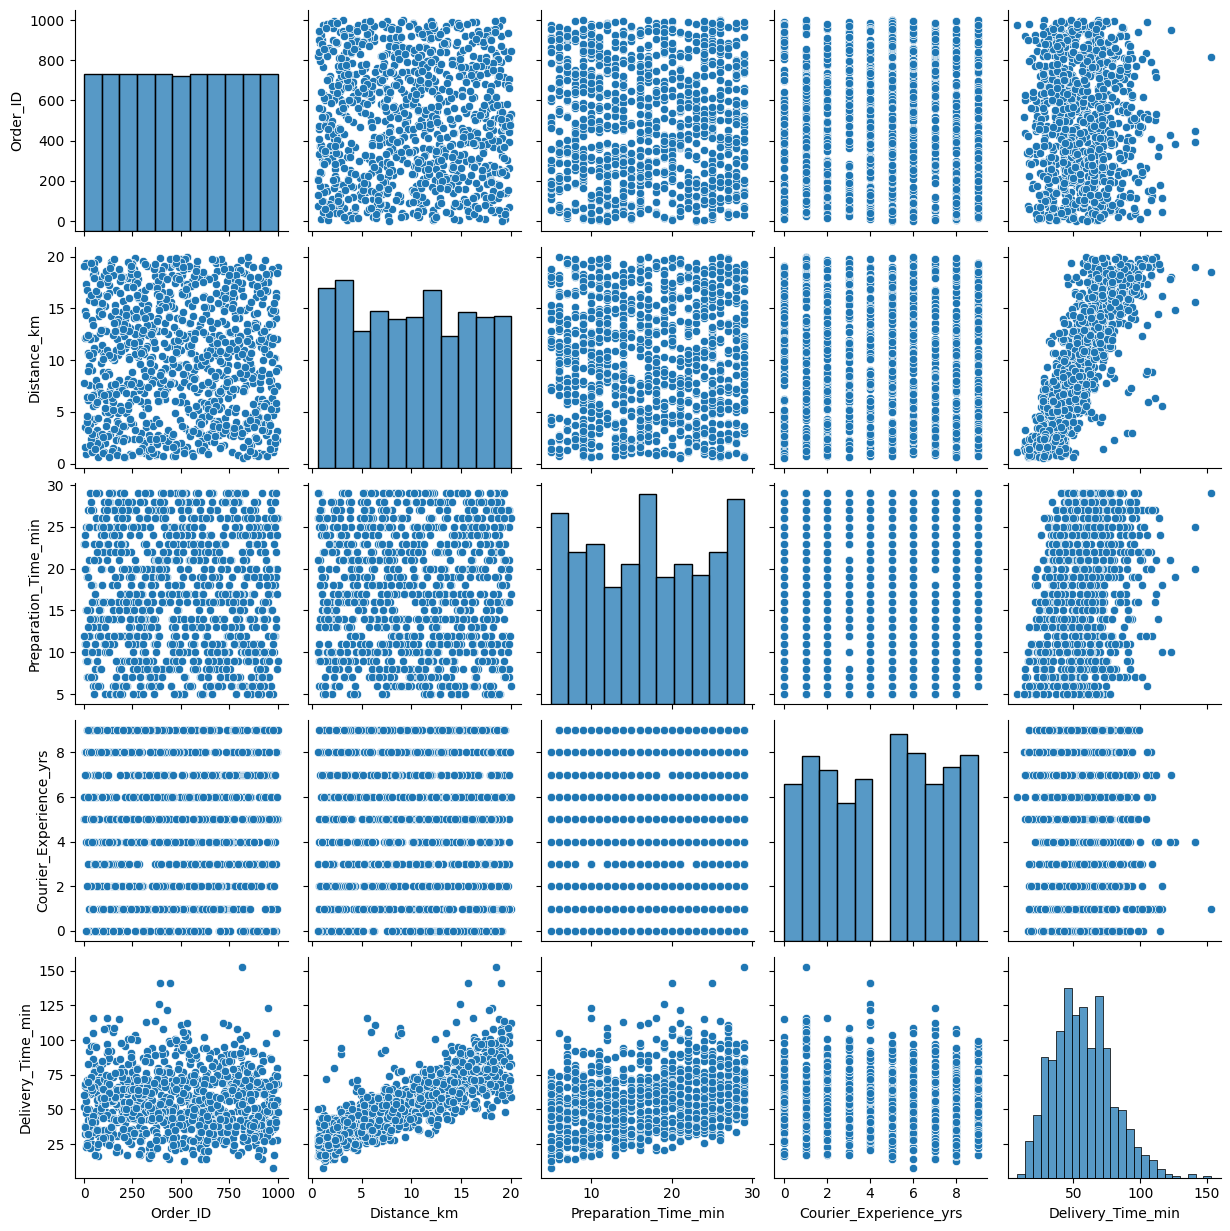

In [277]:
sns.pairplot(df)

### Mapping Values
Linear Regression works only on numeric data, so we need to convert categorical columns into numbers.

In [278]:
df_copy = df.copy()

In [279]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Weather'] = le.fit_transform(df['Weather'])
df['Traffic_Level'] = le.fit_transform(df['Traffic_Level'])
df['Time_of_Day'] = le.fit_transform(df['Time_of_Day'])
df['Vehicle_Type'] = le.fit_transform(df['Vehicle_Type'])


In [280]:
df.shape


(1000, 9)

In [281]:
df_copy.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [282]:
df_dummies = pd.get_dummies(df_copy, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'])

In [283]:
df_dummies = df_dummies.astype(int)
df_dummies

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_High,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7,12,1,43,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
1,738,16,20,2,84,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,741,9,28,1,59,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,661,7,5,1,37,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1
4,412,19,16,5,68,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,107,8,13,3,54,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
996,271,16,8,9,71,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
997,861,15,26,2,81,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
998,436,14,8,0,55,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0


## **Defining Features and Target**

X (features) → known factors (distance, traffic, weather, etc.)

y (target) → what we want to predict (delivery time)


In [284]:
x_encoded = df.drop('Delivery_Time_min', axis=1)
y_encoded = df['Delivery_Time_min']

x_dummies_encoded = df_dummies.drop(['Delivery_Time_min'], axis=1)
y_dummies_encoded = df_dummies['Delivery_Time_min']


## Splitting Data into Train and Test Sets**

How can we check how well our model performs on unseen data?
Why do we split the dataset into two parts:

Training set (80%) → used to train the model

Testing set (20%) → used to evaluate the modelbrary.


In [285]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y_encoded, test_size=0.2, random_state=42)

## Training the Linear Regression Model**


In [286]:
from sklearn.linear_model import LinearRegression



In [287]:
model_encoded = LinearRegression()


In [288]:
model_encoded.fit(x_train, y_train)

LinearRegression()

In [289]:
y_pred = model_encoded.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(df)-1)/(len(df)-df.shape[1]-1)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

print("Adjusted R-squared:", adjusted_r2)

Mean Absolute Error: 7.28116799690776
Mean Squared Error: 109.23986283518465
R-squared: 0.7562844966321256
Adjusted R-squared: 0.7540689011469631


In [290]:
x_train, x_test, y_train, y_test = train_test_split(x_dummies_encoded, y_dummies_encoded, test_size=0.2, random_state=42)

In [291]:
model_dummies_encoded = LinearRegression()

In [292]:
model_dummies_encoded.fit(x_train, y_train)

LinearRegression()

## Making Predictions

Use the trained model to predict delivery times for the test data.

In [293]:
y_pred = model_dummies_encoded.predict(x_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 6.095126218786042
Mean Squared Error: 81.36714778843955
R-squared: 0.8184688733014349


In [294]:
adjusted_r2 = 1 - (1-r2)*(len(df_dummies)-1)/(len(df_dummies)-df_dummies.shape[1]-1)
print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.8147603722452844


## **Evaluating the Model**

Check how accurate your predictions are by calculating the average error, squared error, and R² score.


### **Visualizing Predictions**


Create a scatter plot to compare actual vs predicted delivery times and visually check how well the model is performing.


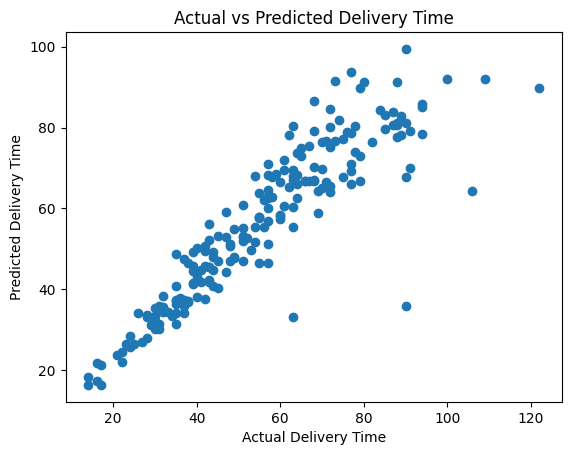

In [295]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.show()

### Ridge Regression
Train a Ridge regression model on the training data, predict delivery times for the test set, and evaluate its accuracy using MAE, MSE, and R².

In [296]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 6.098141933298297
Mean Squared Error: 81.43151661442761
R-squared: 0.8183252656437565


### Lasso Regression
Train a Lasso regression model on your training data, predict delivery times for the test set, and check how accurate the predictions are using MAE, MSE, and R².

In [297]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 7.177479033473499
Mean Squared Error: 107.59657023707406
R-squared: 0.7599507030180991


### Polynomial Regression
Transform your features to include polynomial terms, train a Linear Regression model on them, and calculate the mean squared error to see how well the curved model fits your data.

In [299]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 105.89849925189903
R-squared: 0.763739120672291


# Conclusion
-Predicted food delivery times using features like distance, traffic, weather, time, and courier experience.

-Applied Linear Regression for basic predictions.

-Used Ridge and Lasso to reduce overfitting and improve accuracy.

-Explored Polynomial Regression to capture nonlinear relationships.

-Evaluated models with MAE, MSE, and R² to measure performance.

-Demonstrated a real-world application of regression in optimizing delivery operations.